In [70]:
import numpy as np
import pandas as pd
from numpy.linalg import norm
from statistics import mean
from sklearn.metrics.pairwise import cosine_similarity as cs
import matplotlib.pyplot as plt


In [87]:
df = pd.read_csv('currents_info.csv')
tns = ['SHOOT!', 'Gone Girl', 'Yuck', 'Open Arms (feat. Travis Scott)', 'Kill Bill', 'Used (feat. Don Toliver)', 'we all try', 'Snooze', 'Used To Know Me',
          'Sweet Life', "Walk Em Down (Don't Kill Civilians) [with 21 Savage & feat. Mustafa]", 'Pilot Jones', "Don't Get Chipped", 'JoHn Muir', 'TorcH']


In [88]:
t1 = df.iloc[0, 1:]
t2 = df.iloc[1, 1:]
print('t1 is ' + tns[0])
print('t2 is ' + tns[1])

t1_stats = np.array(t1)
t2_stats = np.array(t2)
print('Cosine similarity value: ' + str(cosine(t1_stats, t2_stats)))


t1 is SHOOT!
t2 is Gone Girl
Cosine similarity value: 0.9997331249612476


In [15]:
t4 = df.iloc[3, 1:]
t4_label = labels[3]
print('Cosine similarity between Gone Girl and Open Arms : ' + str(cosine(t2_stats, np.array(t4))))

Cosine similarity between Gone Girl and Open Arms : 0.9955201491251041


In [17]:
t15 = df.iloc[-1, 1:]
print('Cosine similarity between Gone Girl and TorcH : ' +
      str(cosine(t2_stats, np.array(t15))))


Cosine similarity between Gone Girl and TorcH : 0.9996198689617349


In [20]:
print(str(t2[-1] * .001))
print()
print(str(t15[-1] * .001))


0.150007

0.139505


In [23]:
t2_scaled = t2
t15_scaled = t15
t2_scaled[-1] = t2_scaled[-1]*.001
t15_scaled[-1] = t15_scaled[-1]*.001
t2_scaled[3] = t2_scaled[3]*.1
t15_scaled[3] = t15_scaled[3]*.1
print(t2_scaled)
print()
print(t15_scaled)

danceability         0.428
energy               0.439
key                      5
loudness           -0.7674
mode                   0.1
speechiness         0.0591
acousticness          0.57
instrumentalness       0.0
liveness             0.153
valence              0.418
tempo                  0.0
Name: 1, dtype: object

danceability           0.468
energy                 0.912
key                        1
loudness             -0.6909
mode                     0.0
speechiness            0.448
acousticness          0.0874
instrumentalness    0.000015
liveness               0.128
valence                0.438
tempo                    0.0
Name: 14, dtype: object


In [24]:
print(cosine(t2_scaled, t15_scaled))

0.7255938230414652


In [27]:
print(cosine(np.array(scale(t2)), np.array(scale(t4))))

0.8517699316803921


In [93]:
def scale(A):
    A[2] = A[2] * .1
    A[-1] = A[-1] * .001
    A[3] = A[3] * .1
    A[4] = A[4] * .1
    return A

In [14]:
def cosine(A, B):
    cosine = np.dot(A, B)/(norm(A)*norm(B))
    return cosine

In [28]:
def generate_similarities(A, list_of_tracks):
    return [cosine(np.array(scale(A)), np.array(scale(track))) for track in list_of_tracks]

In [37]:
sim_scores = generate_similarities(t2, df.iloc[:, 1:].values.tolist())

In [39]:
print('The song is ' + labels[1])
for i in range(len(labels)):
    print('Score for ' + labels[i] + ' : ' + str(sim_scores[i]))


The song is Gone Girl
Score for SHOOT! : 0.8849346197304665
Score for Gone Girl : 0.6706504314193203
Score for Yuck : 0.34073901796237394
Score for Open Arms (feat. Travis Scott) : 0.8517551418807551
Score for Kill Bill : 0.8867735413474581
Score for Used (feat. Don Toliver) : 0.9115986102810465
Score for we all try : 0.2849798633031449
Score for Snooze : 0.6879410502815712
Score for Used To Know Me : 0.40660996710139896
Score for Sweet Life : 0.933167330862875
Score for Walk Em Down (Don't Kill Civilians) [with 21 Savage & feat. Mustafa] : 0.27220208080902886
Score for Pilot Jones : 0.63390429734641
Score for Don't Get Chipped : 0.8122077181593509
Score for JoHn Muir : 0.5306315122838197
Score for TorcH : 0.30655546722534827


In [50]:
def avg_cos_sim(A, list_of_tracks):
    return mean(generate_similarities(A, list_of_tracks))


In [51]:
print(avg_cos_sim(t1, df.iloc[:, 1:].values.tolist()))
print(avg_cos_sim(t2, df.iloc[:, 1:].values.tolist()))
print(avg_cos_sim(t4, df.iloc[:, 1:].values.tolist()))
print(avg_cos_sim(t15, df.iloc[:, 1:].values.tolist()))


0.8798499312818682
0.6276433614190161
0.8964519089430757
0.7002035783227162


In [52]:
for track in df.iloc[:, 1:].values.tolist():
    print(avg_cos_sim(track, df.iloc[:, 1:].values.tolist()))


0.879859946230242
0.9384219377640172
0.8667301036883482
0.8964563979039848
0.8743068283200105
0.856492409365822
0.8495436631266639
0.9391573329919616
0.8786932539390152
0.8266937431577607
0.8443751215819341
0.9353297767904474
0.918331549083653
0.9214301019815491
0.8571256598929934


In [69]:
cs((df.iloc[1, 1:].values.reshape(1, -1)),
   df.iloc[14, 1:].values.reshape(1, -1))


array([[0.99961987]])

In [79]:
labels = df.columns[1:]
angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
labels

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'],
      dtype='object')

In [90]:
t15.values.tolist()
scale(t1.values.tolist())


[0.852, 0.762, 6, -4.448, 0.0, 0.0487, 0.333, 1.66e-06, 0.159, 0.907, 0.131958]

In [103]:
def plot(A, B, tids):
        fig = plt.figure(figsize=(18,18))
        ax = fig.add_subplot(221, polar = True)
        
        ax.plot(angles, scale(A), 'o-',linewidth=2, label=tids[0], color='blue')
        ax.fill(angles, scale(A), alpha=0.25, facecolor='blue')

        ax.plot(angles, scale(B), 'o-', linewidth=2, label=tids[1], color= 'orange')
        ax.fill(angles, scale(B), alpha=0.25, facecolor='orange')

        ax.set_thetagrids(angles * 180/np.pi, labels, fontsize=13)

        plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1))

        return fig

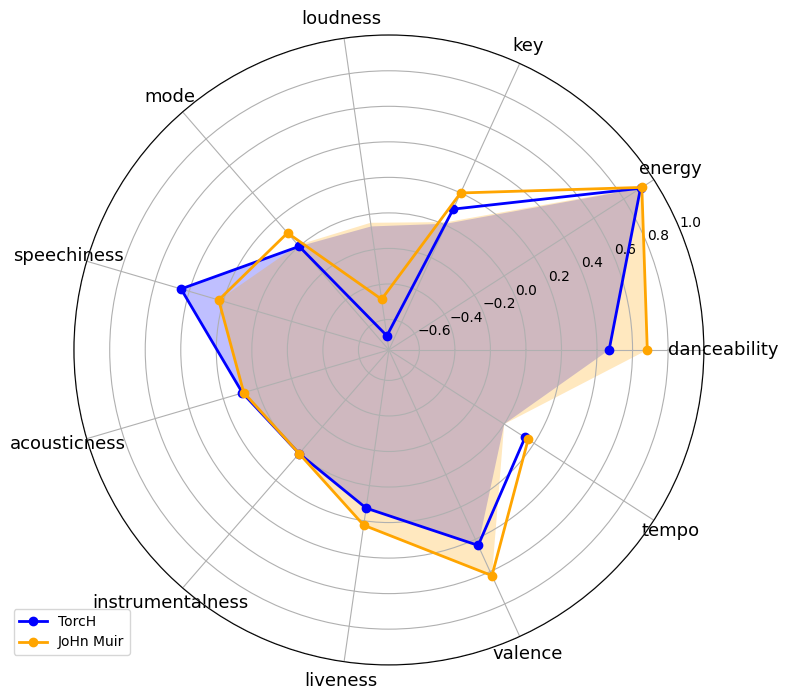

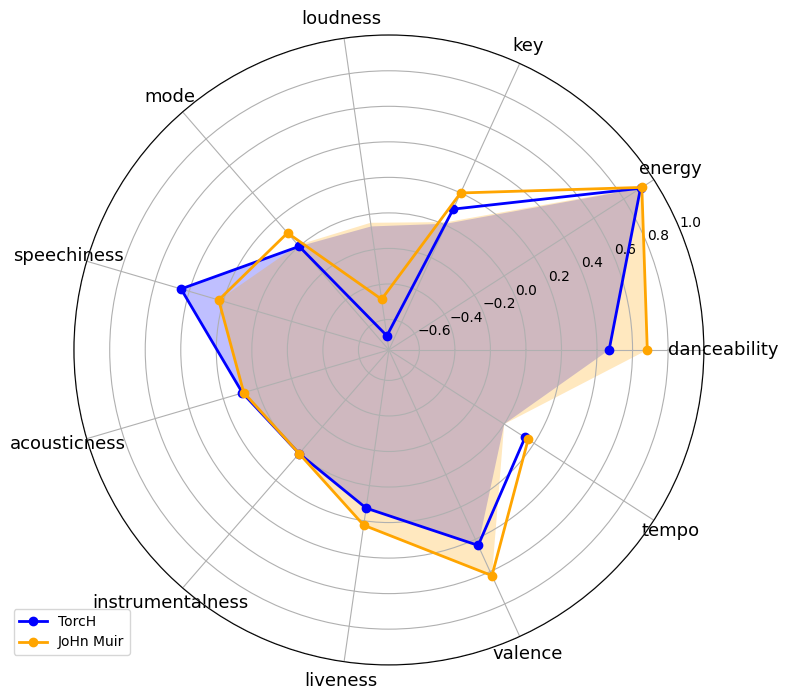

In [104]:
plot(df.iloc[-1, 1:].values.tolist(), df.iloc[-2, 1:].values.tolist(), [tns[-1], tns[-2]])
